<a href="https://colab.research.google.com/github/Sai0472003/PatentLitigation_Impact/blob/main/PROJECT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Patent Litigations: What Are The Costs And Who Bears Them?***

# ***Section 1: Introduction:***

# ***Section 2: Data Cleaning/Loading:***

In [19]:
#loading useful packages
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import statsmodels.api as sm
import statsmodels.formula.api as smf
!pip install stargazer
from stargazer.stargazer import Stargazer
from IPython.display import HTML



from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#loading csv's that have been a little precleaned and merged to avoid excessive
#lines of code for the cleaning section

#loading up csv's into Data Frames
merged_cases_FJC = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/clean_cases_JFC.csv')
subset_plaintiff_npm = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/clean_plaintiff_npm.csv')
subset_defendent_npm = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/clean_defendent_npm.csv')
subset_plaintiff_RnD = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/clean_plaintiff_RnD.csv')
subset_defendent_RnD = pd.read_csv('/content/drive/My Drive/ECO225_Final_Project/DATA/clean_defendent_RnD.csv')

In [21]:
#creating plaintiff-only df with all the Y and X variables
#(no index or geospatial data)
plaintiffs_complete = pd.merge(subset_plaintiff_npm,
                               subset_plaintiff_RnD,
                               on=[
                                   "case_row_id", "disp_dismissed",
                                   "disp_settled", "disp_before_issue_joined",
                                   "infringement_35_271", "case_length",
                                   "info_tech", "health_care", "materials",
                                   "industrials", "consumer_discretionary"],
                               how = 'outer')

plaintiffs_complete = plaintiffs_complete.drop_duplicates()
plaintiffs_complete = plaintiffs_complete[[
                            "delta_npm", "delta_rnd_sales","disp_dismissed",
                            "disp_settled", "disp_before_issue_joined",
                            "infringement_35_271", "case_length", "info_tech",
                            "health_care","materials","industrials",
                            "consumer_discretionary"
                             ]]

In [22]:
plaintiffs_complete.head()

,delta_npm,delta_rnd_sales,disp_dismissed,disp_settled,disp_before_issue_joined,infringement_35_271,case_length,info_tech,health_care,materials,industrials,consumer_discretionary
0,NaN,0.009418,0.0,0.0,0.0,0.0,6.588926,0,0,0,1,0
1,-0.056082,NaN,0.0,0.0,0.0,0.0,727.000000,0,0,0,1,0
2,NaN,0.005320,0.0,0.0,1.0,0.0,4.595120,1,0,0,0,0
3,-0.061502,NaN,0.0,0.0,1.0,0.0,99.000000,1,0,0,0,0
4,NaN,0.017003,1.0,1.0,1.0,1.0,5.225747,0,1,0,0,0


In [23]:
#creating defendent-only df with all the Y and X variables,
#(no index or geospatial data)
defendents_complete = pd.merge(subset_defendent_npm,
                               subset_defendent_RnD,
                               on=[
                                   "case_row_id", "disp_dismissed",
                                   "disp_settled", "disp_before_issue_joined",
                                   "infringement_35_271", "case_length",
                                   "info_tech", "health_care"],
                               how = 'outer')

defendents_complete = defendents_complete.drop_duplicates()
defendents_complete = defendents_complete[[
                            "delta_npm", "delta_rnd_sales","disp_dismissed",
                            "disp_settled", "disp_before_issue_joined",
                            "infringement_35_271", "case_length", "info_tech",
                            "health_care"
                             ]]

In [24]:
defendents_complete.head()

,delta_npm,delta_rnd_sales,disp_dismissed,disp_settled,disp_before_issue_joined,infringement_35_271,case_length,info_tech,health_care
0,-0.523178,0.043103,1.0,0.0,1.0,0.0,6.169611,0,0
1,-0.002907,0.000000,1.0,1.0,0.0,0.0,6.350886,0,0
2,0.004274,0.005925,1.0,1.0,0.0,0.0,6.037871,0,0
3,0.001192,-0.000766,1.0,1.0,1.0,1.0,5.484797,0,0
4,0.013409,-0.003403,1.0,1.0,1.0,1.0,5.123964,0,1


# ***Section 3: Summary Statistics:***

In [25]:
plaintiffs_complete.describe()

,delta_npm,delta_rnd_sales,disp_dismissed,disp_settled,disp_before_issue_joined,infringement_35_271,case_length,info_tech,health_care,materials,industrials,consumer_discretionary
count,1147.000000,1157.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
mean,8.741107,-0.764724,0.733941,0.619358,0.280816,0.517361,272.483973,0.394531,0.258681,0.069444,0.108941,0.118056
std,184.206505,82.468427,0.441991,0.485650,0.449495,0.499807,448.999728,0.488856,0.438005,0.254264,0.311633,0.322744
min,-348.520087,-1273.693333,0.000000,0.000000,0.000000,0.000000,3.044522,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.033832,-0.003042,0.000000,0.000000,0.000000,0.000000,5.934894,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.000521,0.000473,1.000000,1.000000,0.000000,1.000000,8.012618,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.025305,0.010271,1.000000,1.000000,1.000000,1.000000,378.250000,1.000000,1.000000,0.000000,0.000000,0.000000
max,3594.053333,1212.250000,1.000000,1.000000,1.000000,1.000000,4201.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
defendents_complete.describe()

,delta_npm,delta_rnd_sales,disp_dismissed,disp_settled,disp_before_issue_joined,infringement_35_271,case_length,info_tech,health_care
count,2557.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000
mean,-0.079224,0.013422,0.816335,0.604533,0.418132,0.633060,5.586478,0.148105,0.386088
std,3.238747,0.720413,0.387287,0.489046,0.493349,0.482064,0.966466,0.355273,0.486946
min,-152.326629,-7.251561,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000
25%,-0.019312,-0.001439,1.000000,0.000000,0.000000,0.000000,4.863673,0.000000,0.000000
50%,0.001188,0.000000,1.000000,1.000000,0.000000,1.000000,5.583496,0.000000,0.000000
75%,0.021006,0.003631,1.000000,1.000000,1.000000,1.000000,6.309005,0.000000,1.000000
max,18.700229,31.787848,1.000000,1.000000,1.000000,1.000000,8.628019,1.000000,1.000000


# ***Section 4: Data Visualizations:***

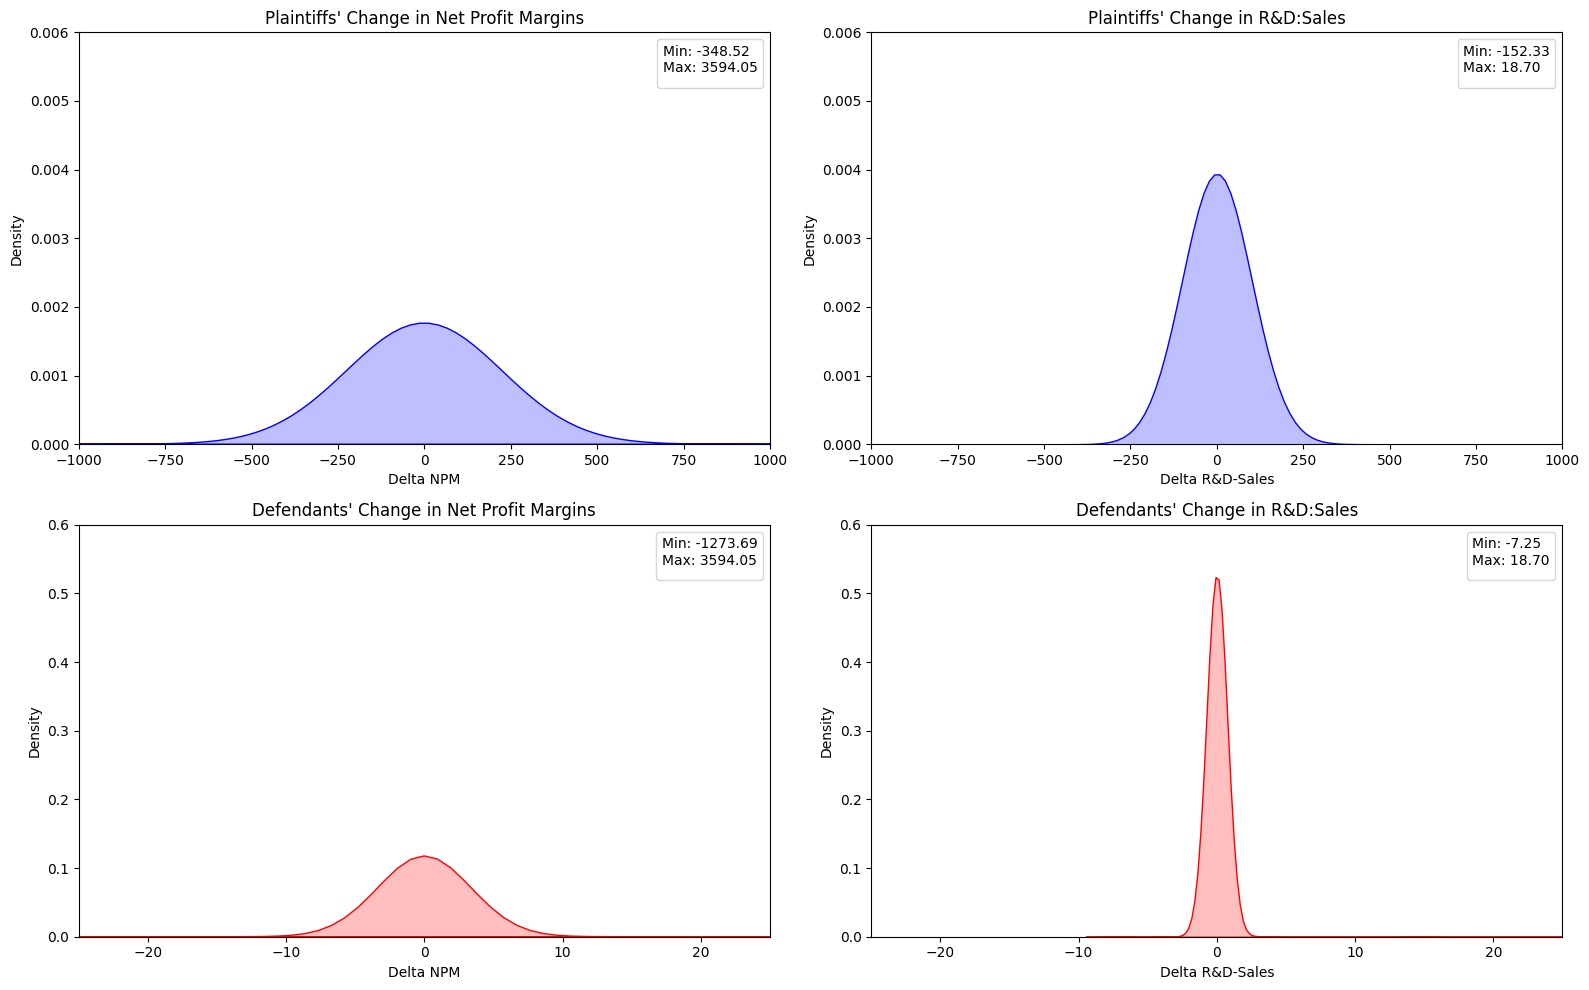

In [27]:
# Density plots for NPM and RnD:Sales
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot KDE for plaintiffs NPM
sns.kdeplot(plaintiffs_complete["delta_npm"],
            fill=True, color="blue", ax=axes[0,0],bw_adjust=5)
axes[0,0].set_title("Plaintiffs' Change in Net Profit Margins")
axes[0,0].set_xlabel("Delta NPM")
axes[0,0].set_ylabel("Density")
axes[0,0].grid(False)

# Plot KDE for defendants NPM
sns.kdeplot(defendents_complete["delta_npm"],
            fill=True, color="red", ax=axes[1,0],bw_adjust=5)
axes[1,0].set_title("Defendants' Change in Net Profit Margins")
axes[1,0].set_xlabel("Delta NPM")
axes[1,0].grid(False)

# Plot KDE for plaintiffs Rnd
sns.kdeplot(plaintiffs_complete["delta_rnd_sales"],
            fill=True, color="blue", ax=axes[0,1], bw_adjust=5)
axes[0,1].set_title("Plaintiffs' Change in R&D:Sales")
axes[0,1].set_xlabel("Delta R&D-Sales")
axes[0,1].set_ylabel("Density")
axes[0,1].grid(False)

# Plot KDE for defendants Rnd
sns.kdeplot(defendents_complete["delta_rnd_sales"],
            fill=True, color="red", ax=axes[1,1],bw_adjust=5)
axes[1,1].set_title("Defendants' Change in R&D:Sales")
axes[1,1].set_xlabel("Delta R&D-Sales")
axes[1,1].grid(False)


# Add min and max values as text legend
axes[0,0].legend(
    handles=[],
    title=f"Min: {plaintiffs_complete['delta_npm'].min():.2f}\nMax: {plaintiffs_complete['delta_npm'].max():.2f}",
    loc="upper right")
axes[0,1].legend(
    handles=[],
    title=f"Min: {defendents_complete['delta_npm'].min():.2f}\nMax: {defendents_complete['delta_npm'].max():.2f}",
    loc="upper right")
axes[1,0].legend(
    handles=[],
    title=f"Min: {plaintiffs_complete['delta_rnd_sales'].min():.2f}\nMax: {plaintiffs_complete['delta_npm'].max():.2f}",
    loc="upper right")
axes[1,1].legend(
    handles=[],
    title=f"Min: {defendents_complete['delta_rnd_sales'].min():.2f}\nMax: {defendents_complete['delta_npm'].max():.2f}",
    loc="upper right")



#zooming into the peaks
axes[0,0].set_ylim(0, 0.006)
axes[0,0].set_xlim(-1000, 1000)
axes[1,0].set_ylim(0, 0.6)
axes[1,0].set_xlim(-25, 25)
axes[0,1].set_ylim(0, 0.006)
axes[0,1].set_xlim(-1000, 1000)
axes[1,1].set_ylim(0, 0.6)
axes[1,1].set_xlim(-25, 25)

plt.tight_layout()
plt.show()

In [28]:
plaintiffs_complete['delta_rnd_sales'].isna().sum()

np.int64(1147)

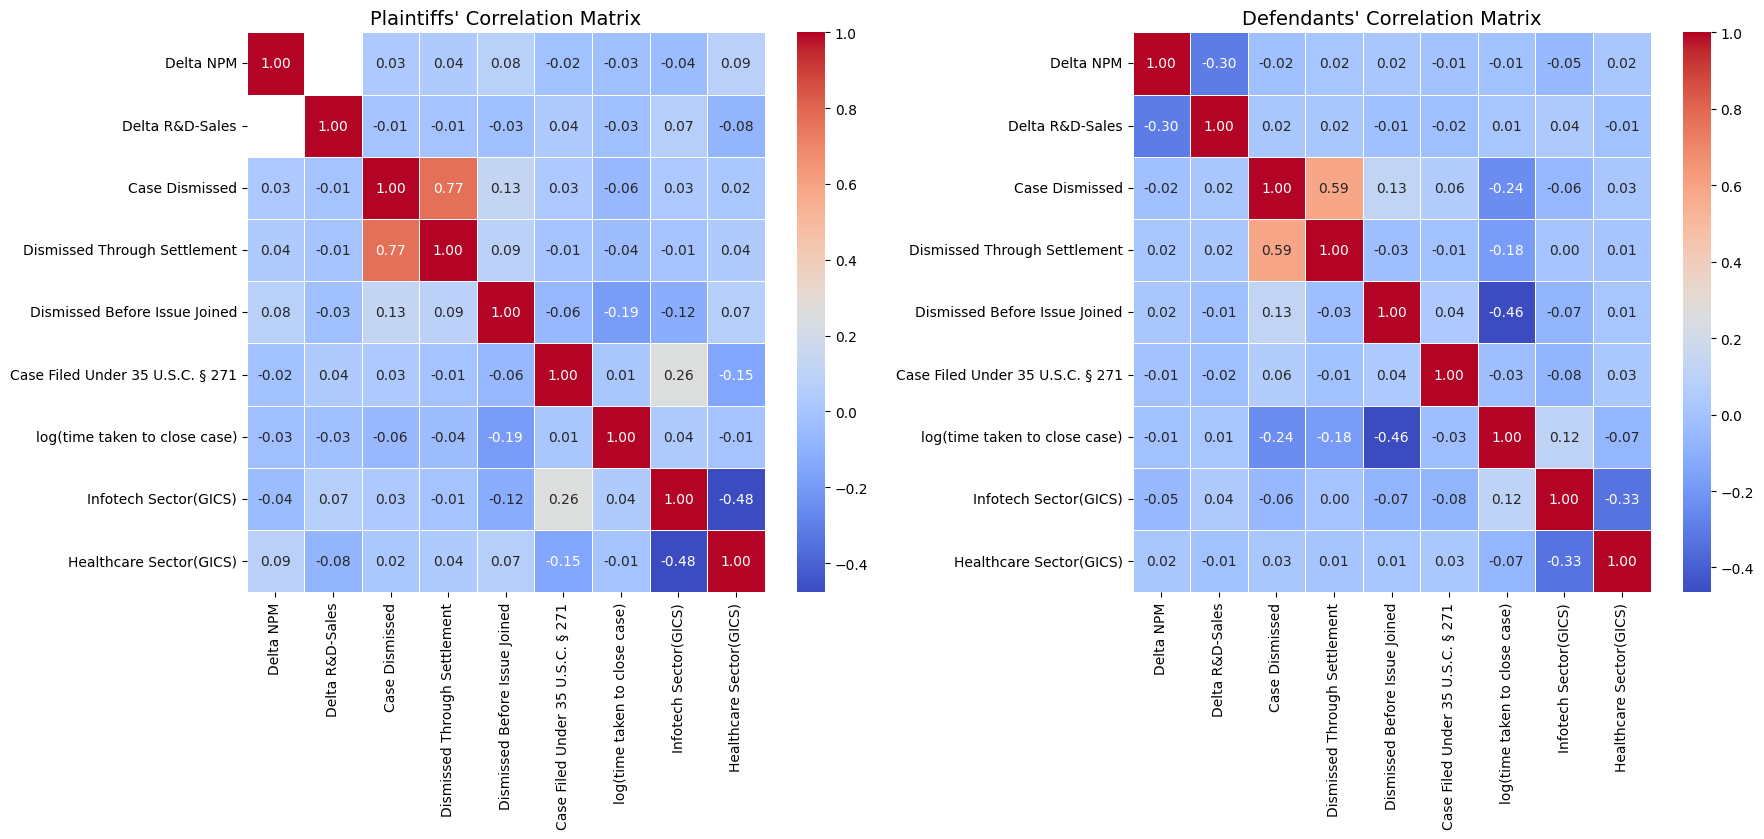

In [29]:
# Compute correlation matrices
corr_matrix_plt = plaintiffs_complete[[
    'delta_npm', 'delta_rnd_sales', 'disp_dismissed', 'disp_settled',
    'disp_before_issue_joined', 'infringement_35_271', 'case_length',
    'info_tech', 'health_care'
    ]].corr()
corr_matrix_def = defendents_complete[[
    'delta_npm', 'delta_rnd_sales', 'disp_dismissed', 'disp_settled',
    'disp_before_issue_joined','infringement_35_271', 'case_length',
    'info_tech', 'health_care'
    ]].corr()

# Rename labels using the provided mapping
label_mapping = {
    "delta_npm": "Delta NPM",
    "delta_rnd_sales": "Delta R&D-Sales",
    "disp_dismissed": "Case Dismissed",
    "disp_settled": "Dismissed Through Settlement",
    "disp_before_issue_joined": "Dismissed Before Issue Joined",
    "infringement_35_271": "Case Filed Under 35 U.S.C. § 271",
    "case_length": "log(time taken to close case)",
    "info_tech": "Infotech Sector(GICS)",
    "health_care": "Healthcare Sector(GICS)",
    "materials": "Materials Sector(GICS)",
    "industrials": "Industrials Sector(GICS)",
    "consumer_discretionary": "Consumer Discretionary Sector(GICS)"
}

# Apply clean labels
corr_matrix_plt = corr_matrix_plt.rename(columns=label_mapping, index=label_mapping)
corr_matrix_def = corr_matrix_def.rename(columns=label_mapping, index=label_mapping)

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 10))  # Increase size for clarity

# Plot for Plaintiffs
sns.heatmap(corr_matrix_plt, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Plaintiffs' Correlation Matrix", fontsize=14)
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability
axes[0].tick_params(axis='y', rotation=0)   # Keep y-axis labels straight

# Plot for Defendants
sns.heatmap(corr_matrix_def, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Defendants' Correlation Matrix", fontsize=14)
axes[1].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout(rect=[0, 0.15, 1, 1])
plt.show()

# ***Section 5: The Message:***

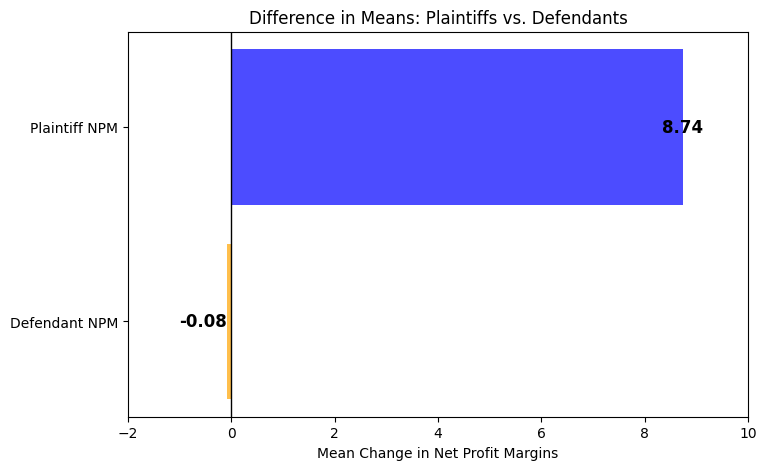

In [30]:
# Compute means
mean_plaintiff = plaintiffs_complete["delta_npm"].mean()
mean_defendant = defendents_complete["delta_npm"].mean()

# Define categories and means
categories = ["Defendant NPM", "Plaintiff NPM"]  # Defendant first so negative is on the left
means = [mean_defendant, mean_plaintiff]  # Order matters!

# Create the horizontal bar plot
plt.figure(figsize=(8, 5))
plt.barh(categories, means, color=["orange", "blue"], alpha=0.7)

# Annotate mean values on bars
for i, mean in enumerate(means):
    plt.text(mean, i, f"{mean:.2f}", ha="center" if mean > 0 else "right",
             va="center", fontsize=12, fontweight="bold", color="black")

# Improve readability
plt.axvline(0, color="black", linewidth=1)  # Add vertical line at x=0 for reference
plt.xlabel("Mean Change in Net Profit Margins")
plt.title("Difference in Means: Plaintiffs vs. Defendants")
plt.xlim(-2,10)

# Show plot
plt.show()


Plaintiffs are observed to have a 8.74 percentage point increase in profit margins, on average, whereas Defendents are observed to have a 0.08 percentage point decrease in their profit margins, on average.

# ***Section 6: Maps:***

In [47]:
import geopandas as gpd
import os

# Load the shapefile of U.S. judicial districts (Update with actual path)
shapefile_path = "/content/drive/My Drive/ECO225_Final_Project/DATA/U.S._District_Courts.shp"
df = pd.read_csv("/content/drive/My Drive/ECO225_Final_Project/DATA/U.S._District_Courts.csv")

# Set the SHAPE_RESTORE_SHX config option to YES
# This tells GDAL (which pyogrio uses) to try to repair or create the .shx file if it's missing
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

gdf = gpd.read_file(shapefile_path)
merged_gdf = gdf.merge(df, left_index=True, right_index=True)

In [48]:
#Manually renaming codes, based on technical documentation from the FJC datase
court_mapping = {
    "00": "Maine District Court",
    "01": "Massachusetts District Court",
    "02": "New Hampshire District Court",
    "03": "Rhode Island District Court",
    "04": "Puerto Rico District Court",
    "05": "Connecticut District Court",
    "06": "New York Northern District Court",
    "07": "New York Eastern District Court",
    "08": "New York Southern District Court",
    "09": "New York Western District Court",
    "10": "Vermont District Court",
    "11": "Delaware District Court",
    "12": "New Jersey District Court",
    "13": "Pennsylvania Eastern District Court",
    "14": "Pennsylvania Middle District Court",
    "15": "Pennsylvania Western District Court",
    "16": "Maryland District Court",
    "17": "North Carolina Eastern District Court",
    "18": "North Carolina Middle District Court",
    "19": "North Carolina Western District Court",
    "20": "South Carolina District Court",
    "22": "Virginia Eastern District Court",
    "23": "Virginia Western District Court",
    "24": "West Virginia Northern District Court",
    "25": "West Virginia Southern District Court",
    "26": "Alabama Northern District Court",
    "27": "Alabama Middle District Court",
    "28": "Alabama Southern District Court",
    "29": "Florida Northern District Court",
    "3A": "Florida Middle District Court",
    "3C": "Florida Southern District Court",
    "3E": "Georgia Northern District Court",
    "3G": "Georgia Middle District Court",
    "3J": "Georgia Southern District Court",
    "3L": "Louisiana Eastern District Court",
    "3N": "Louisiana Middle District Court",
    "36": "Louisiana Western District Court",
    "37": "Mississippi Northern District Court",
    "38": "Mississippi Southern District Court",
    "39": "Texas Northern District Court",
    "40": "Texas Eastern District Court",
    "41": "Texas Southern District Court",
    "42": "Texas Western District Court",
    "43": "Kentucky Eastern District Court",
    "44": "Kentucky Western District Court",
    "45": "Michigan Eastern District Court",
    "46": "Michigan Western District Court",
    "47": "Ohio Northern District Court",
    "48": "Ohio Southern District Court",
    "49": "Tennessee Eastern District Court",
    "50": "Tennessee Middle District Court",
    "51": "Tennessee Western District Court",
    "52": "Illinois Northern District Court",
    "53": "Illinois Central District Court",
    "54": "Illinois Southern District Court",
    "55": "Indiana Northern District Court",
    "56": "Indiana Southern District Court",
    "57": "Wisconsin Eastern District Court",
    "58": "Wisconsin Western District Court",
    "60": "Arkansas Eastern District Court",
    "61": "Arkansas Western District Court",
    "62": "Iowa Northern District Court",
    "63": "Iowa Southern District Court",
    "64": "Minnesota District Court",
    "65": "Missouri Eastern District Court",
    "66": "Missouri Western District Court",
    "67": "Nebraska District Court",
    "68": "North Dakota District Court",
    "69": "South Dakota District Court",
    "70": "Arizona District Court",
    "71": "California Northern District Court",
    "72": "California Eastern District Court",
    "73": "California Central District Court",
    "74": "California Southern District Court",
    "75": "Hawaii District Court",
    "76": "Idaho District Court",
    "77": "Montana District Court",
    "78": "Nevada District Court",
    "79": "Oregon District Court",
    "80": "Washington Eastern District Court",
    "81": "Washington Western District Court",
    "82": "Colorado District Court",
    "83": "Kansas District Court",
    "84": "New Mexico District Court",
    "85": "Oklahoma Northern District Court",
    "86": "Oklahoma Eastern District Court",
    "87": "Oklahoma Western District Court",
    "88": "Utah District Court",
    "89": "Wyoming District Court",
    "90": "District of Columbia District Court",
    "91": "Virgin Islands District Court",
    "92": "Guam District Court",
    "94": "Northern Mariana Islands District Court",
    "-8": None  # Missing value
}

circuit_mapping = {
    "1": "First Circuit",
    '2': "Second Circuit",
    '3': "Third Circuit",
    '4': "Fourth Circuit",
    '5': "Fifth Circuit",
    '6': "Sixth Circuit",
    '7': "Seventh Circuit",
    '8': "Eighth Circuit",
    '9': "Ninth Circuit",
    '10': "Tenth Circuit",
    '11': "Eleventh Circuit",
    '0': "District of Columbia Circuit",
    '-8': None  # Missing value case
}

#applying the mapping
maps = merged_cases_FJC.copy()
maps["DISTRICT"] = maps["DISTRICT"].map(court_mapping)


In [ ]:
#merging and creating new columns for heat maps
#aggregating filings:
district_filings = maps.groupby('DISTRICT')['case_number'].nunique()

#merging with gdf
maps_complete = merged_gdf.merge(maps, left_on='NAME',right_on='DISTRICT', how='left')
maps_complete.rename(columns={'case_number': 'total_filings'}, inplace=True)
maps_complete.drop_duplicates(inplace=True)

# Convert to numeric (if necessary) and map to circuit names
maps_complete["CIRCUIT"] = maps_complete["CIRCUIT"].astype(str).map(circuit_mapping)

# Compute total filings per circuit and assign to each row
maps_complete["circuit_total_filings"] = maps_complete.groupby("CIRCUIT")["total_filings"].transform("sum")

In [46]:
maps_complete = maps_complete.dropna(subset=['geometry'])
maps_complete.drop_duplicates(inplace=True)
maps_complete = maps_complete[['geometry', 'NAME','STATE_NAME', 'Website',
                               'Circuit', 'case_row_id', 'case_number',
                               'district_total_filings',
                               'circuit_total_filings', 'filings_per_court',
                               'circuit_disp_dismissed',
                               'disp_dismissed_per_court']]

# Aggregate total filings per circuit for both full and subset datasets
maps_complete = maps_complete.groupby("Circuit")[["circuit_total_filings"]].first().reset_index()

# Merge these totals back into the map to color circuits correctly
maps_comepelete = maps_complete.dissolve(by="Circuit", aggfunc="first").reset_index()

AttributeError: 'DataFrame' object has no attribute 'dissolve'

In [35]:
maps_complete.columns

Index(['geometry', 'NAME', 'STATE_NAME', 'Website', 'Circuit', 'case_row_id',
       'case_number', 'district_total_filings', 'circuit_total_filings',
       'filings_per_court', 'circuit_disp_dismissed',
       'disp_dismissed_per_court'],
      dtype='object')

In [42]:
maps_complete

,geometry,NAME,STATE_NAME,Website,Circuit,case_row_id,case_number,district_total_filings,circuit_total_filings,filings_per_court,circuit_disp_dismissed,disp_dismissed_per_court
0,"POLYGON ((-9500693.907 3961798.723, -9500553.8...",Alabama Middle District Court,Alabama,https://pacer.uscourts.gov/file-case/court-cme...,11,78121.0,2:11-cv-01037,1.0,31387.0,3487.444444,231.0,25.666667
1,"MULTIPOLYGON (((-9804827.172 3535998.323, -980...",Alabama Southern District Court,Alabama,https://pacer.uscourts.gov/file-case/court-cme...,11,77089.0,1:17-cv-00179,1.0,31387.0,3487.444444,231.0,25.666667
2,"POLYGON ((-9802773.578 4164763.627, -9801806.6...",Alabama Northern District Court,Alabama,https://pacer.uscourts.gov/file-case/court-cme...,11,7660.0,1:99-cv-01028,8.0,31387.0,3487.444444,231.0,25.666667
3,"POLYGON ((-9802773.578 4164763.627, -9801806.6...",Alabama Northern District Court,Alabama,https://pacer.uscourts.gov/file-case/court-cme...,11,78037.0,5:92-cv-02573,8.0,31387.0,3487.444444,231.0,25.666667
4,"POLYGON ((-9802773.578 4164763.627, -9801806.6...",Alabama Northern District Court,Alabama,https://pacer.uscourts.gov/file-case/court-cme...,11,26100.0,1:15-cv-01059,8.0,31387.0,3487.444444,231.0,25.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
7694,"MULTIPOLYGON (((-7405730.836 2024063.132, -740...",Puerto Rico District Court,Puerto Rico,https://pacer.uscourts.gov/file-case/court-cme...,01,57323.0,3:13-cv-01486,9.0,15494.0,3873.500000,100.0,25.000000
7695,"MULTIPOLYGON (((-7405730.836 2024063.132, -740...",Puerto Rico District Court,Puerto Rico,https://pacer.uscourts.gov/file-case/court-cme...,01,50620.0,3:98-cv-01768,9.0,15494.0,3873.500000,100.0,25.000000
7696,"MULTIPOLYGON (((-7405730.836 2024063.132, -740...",Puerto Rico District Court,Puerto Rico,https://pacer.uscourts.gov/file-case/court-cme...,01,50596.0,3:98-cv-01494,9.0,15494.0,3873.500000,100.0,25.000000
7697,"MULTIPOLYGON (((-7405730.836 2024063.132, -740...",Puerto Rico District Court,Puerto Rico,https://pacer.uscourts.gov/file-case/court-cme...,01,57263.0,3:13-cv-01087,9.0,15494.0,3873.500000,100.0,25.000000


KeyboardInterrupt: 

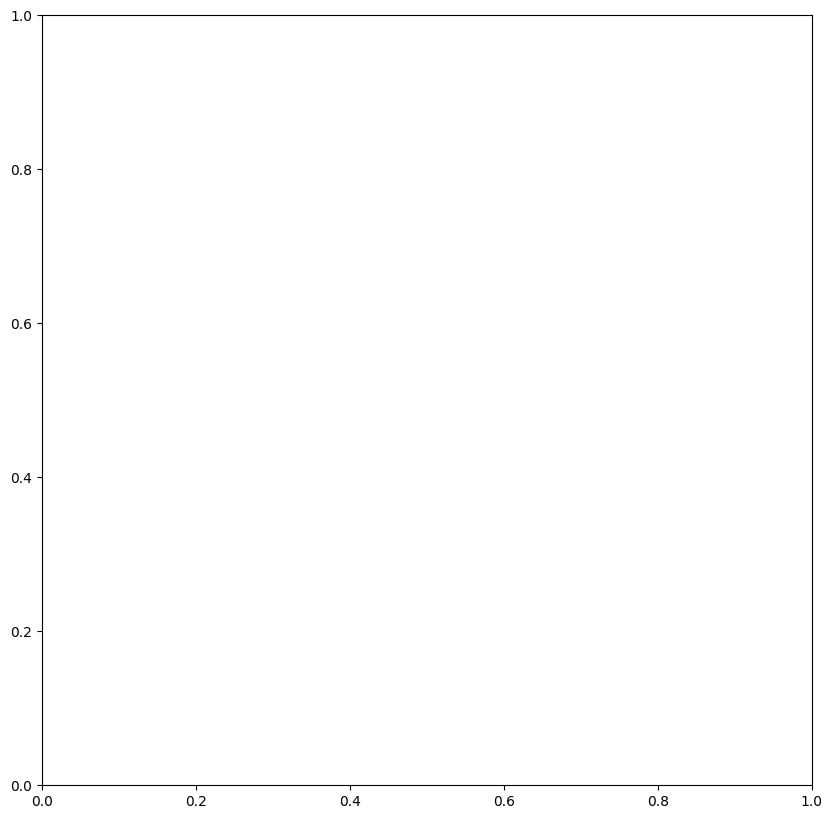

In [41]:
fig, ax = plt.subplots(figsize=(15, 10))

maps_complete.plot(column="filings_per_court",
             cmap="Blues",
             linewidth=0.8,
             edgecolor="black",
             legend=True,
             ax=ax)

ax.set_title("Filings per Court", fontsize=16)
ax.axis("off")  # Hide axis labels
ax.set_xlim([-1.4e7, -7e6])
ax.set_ylim([2e6, 6.5e6])
plt.tight_layout()
plt.show()

# ***Section 7: Regressions:***

In [ ]:
# Regression Table 1.1: The imapct of Case Disposals on Net Profit Margins[Defendents]

#base model
model1_d = smf.ols('delta_npm ~ disp_dismissed + disp_dismissed:disp_settled', data=subset_defendent_npm).fit()
#includes interactions
model2_d = smf.ols('delta_npm ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined', data=subset_defendent_npm).fit()
#includes interactions and case cause and length
model3_d = smf.ols('delta_npm ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined + infringement_35_271 + case_length', data=subset_defendent_npm).fit()
#includes interactions, case cause and GICS sector ficxed effects and case
model4_d = smf.ols('delta_npm ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined + infringement_35_271 + case_length + info_tech + health_care', data=subset_defendent_npm).fit()


#The imapct of Case Disposals on Net Profit Margins[Plaintiffs]

#based model
model1_p = smf.ols('delta_npm ~ disp_dismissed + disp_dismissed:disp_settled', data=subset_plaintiff_npm).fit()
#includes interactions
model2_p = smf.ols('delta_npm ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined', data=subset_plaintiff_npm).fit()
#includes interactions and case cause and length
model3_p = smf.ols('delta_npm ~ disp_dismissed+ disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined + infringement_35_271 + case_length', data=subset_plaintiff_npm).fit()
#includes interactions, case cause and GICS sector ficxed effects and case
model4_p = smf.ols('delta_npm ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined + infringement_35_271 + case_length + info_tech + health_care', data=subset_plaintiff_npm).fit()


#creating stargazer object
stargazer = Stargazer([model1_d, model2_d, model3_d, model4_d,
                       model1_p, model2_p, model3_p, model4_p])

# Custom column names
stargazer.custom_columns([
    "Defendant Model 1", "Defendant Model 2", "Defendant Model 3", "Defendant Model 4",
    "Plaintiff Model 1", "Plaintiff Model 2", "Plaintiff Model 3", "Plaintiff Model 4",
], [1, 1, 1, 1, 1, 1, 1, 1])

# Force variable order to match model specification
stargazer.covariate_order(["Intercept", "disp_dismissed", "disp_dismissed:disp_settled",
                            "disp_dismissed:disp_before_issue_joined", "infringement_35_271",
                            "case_length", "info_tech", "health_care"])

stargazer.rename_covariates({
    "disp_dismissed": "Case Dismissed",
    "disp_dismissed:disp_settled": "Dismissed:Settlement",
    "disp_dismissed:disp_before_issue_joined": "Dismissed:Before Issue Joined",
    "infringement_35_271": "Case Filed Under 35 U.S.C. § 271",
    "case_length": "log(time taken to cose case)",
    "info_tech": "Information Technology Sector(GICS)",
    "health_care": "Healthcare Sector(GICS)",
    "materials": "Materials Sector(GICS)",
    "industrials": "Industrials Sector(GICS)",
    "consumer_discretionary": "Consumer Discretionary Sector(GICS)"})

stargazer.title("Esimated effect of Case Outcomes on Plaintiff Firms' Net Profit Margins")

# Display in Jupyter Notebook
display(HTML(stargazer.render_html()))

In [ ]:
# Regression Table 2.1: The imapct of Case Disposals on RnD-Sales Ratio[Defendent]

#base model
model1_d = smf.ols('delta_rnd_sales ~ disp_dismissed + disp_dismissed:disp_settled', data=subset_defendent_RnD).fit()
#includes interactions
model2_d = smf.ols('delta_rnd_sales ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined', data=subset_defendent_RnD).fit()
#includes interactions and case cause
model3_d = smf.ols('delta_rnd_sales ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined + infringement_35_271 + case_length', data=subset_defendent_RnD).fit()
#includes interactions, case cause and GICS sector ficxed effects and case
model4_d = smf.ols('delta_rnd_sales ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined + infringement_35_271 + case_length + info_tech + health_care', data=subset_defendent_RnD).fit()


# Regression Table 2.2: The imapct of Case Disposals on RnD-Sales Ratio[Plaintiffs]

#based model
model1_p = smf.ols('delta_rnd_sales ~ disp_dismissed + disp_dismissed:disp_settled', data=subset_plaintiff_RnD).fit()
#includes interactions
model2_p = smf.ols('delta_rnd_sales ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined', data=subset_plaintiff_RnD).fit()
#includes interactions and case cause
model3_p = smf.ols('delta_rnd_sales ~ disp_dismissed+ disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined + infringement_35_271 + case_length', data=subset_plaintiff_RnD).fit()
#includes interactions, case cause and GICS sector ficxed effects and case
model4_p = smf.ols('delta_rnd_sales ~ disp_dismissed + disp_dismissed:disp_settled + disp_dismissed:disp_before_issue_joined + infringement_35_271 + case_length + info_tech + health_care', data=subset_plaintiff_RnD).fit()


#creating stargazer object
stargazer = Stargazer([model1_d, model2_d, model3_d, model4_d,
                       model1_p, model2_p, model3_p, model4_p])

# Custom column names
stargazer.custom_columns([
    "Defendant Model 1", "Defendant Model 2", "Defendant Model 3", "Defendant Model 4",
    "Plaintiff Model 1", "Plaintiff Model 2", "Plaintiff Model 3", "Plaintiff Model 4",
], [1, 1, 1, 1, 1, 1, 1, 1])

# Force variable order to match model specification
stargazer.covariate_order(["Intercept", "disp_dismissed", "disp_dismissed:disp_settled",
                            "disp_dismissed:disp_before_issue_joined", "infringement_35_271",
                            "case_length",  "info_tech", "health_care"])

stargazer.rename_covariates({
    "disp_dismissed": "Case Dismissed",
    "disp_dismissed:disp_settled": "Dismissed:Settlement",
    "disp_dismissed:disp_before_issue_joined": "Dismissed:Before Issue Joined",
    "infringement_35_271": "Case Filed Under 35 U.S.C. § 271",
    "case_length": "log(time taken to cose case)",
    "info_tech": "Information Technology Sector(GICS)",
    "health_care": "Healthcare Sector(GICS)",
    "materials": "Materials Sector(GICS)",
    "industrials": "Industrials Sector(GICS)",
    "consumer_discretionary": "Consumer Discretionary Sector(GICS)"})

stargazer.title("Esimated effect of Case Outcomes on Plaintiff Firms' Change in R&D to Sales Ratio")

# Display in Jupyter Notebook
display(HTML(stargazer.render_html()))

# ***Section 8: Conclusion:***